# PCA and ICA

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import ICA
import scipy.signal as signal
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import matplotlib.image as mpimg 

### Implementing Singular Value Decomposition

In [2]:
def svd(X):
    n, m = X.shape
    X_center = X - np.mean(X, axis=0)
    covariance = np.dot(X_center.T, X_center) / (n-1)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    singular_values = np.sqrt(eigenvalues)
    U = np.dot(X_center, eigenvectors) / singular_values
    return U, singular_values, eigenvectors.T

### Implementing PCA using SVD

In [3]:
def pca_using_svd(X):
    U, S, V = svd(X)
    Z = np.dot(U, np.diag(S))
    return Z, V.T

### Implementing PCA using covariance matrix and eigen values

In [4]:
def pca_using_covmat(X):
    n, m = X.shape
    X_center = X - np.mean(X, axis=0)
    C = np.dot(X_center.T, X_center) / (n - 1)
    eigen_values, eigen_vectors = np.linalg.eig(C)
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(m)]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    W = np.hstack([eigen_pairs[i][1].reshape(m, 1) for i in range(m)])
    Z = np.dot(X_center, W)
    return Z, W

In [5]:
def signal_to_noise_ratio(signal, noise):
    return 10 * np.log10(np.sum(signal ** 2) / np.sum(noise ** 2))

In [6]:
def signal_statics(signal):
    return np.mean(signal), np.std(signal)

In [7]:
def plot_components(Z, t):
    n, m = Z.shape
    plt.figure(figsize=(20, 10))
    for i in range(m):
        plt.plot(t, Z[:, i], label=f'Component {i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

In [8]:
def plot_components_separately(S_,t):
    f,ax = plt.subplots(2,2,figsize=(20,10))
    ax[0,0].plot(t, S_[:,0], label='Component 1')
    ax[0,0].plot(t, S_[:,1], label='Component 2')
    ax[0,0].plot(t, S_[:,2], label='Component 3')
    ax[0,0].set_xlabel('Time (s)')
    ax[0,0].set_ylabel('Amplitude')
    ax[0,0].legend()
    ax[0,1].plot(t, S_[:,0], label='Component 1')
    ax[0,1].set_xlabel('Time (s)')
    ax[0,1].set_ylabel('Amplitude')
    ax[0,1].legend()
    ax[1,0].plot(t, S_[:,1], label='Component 2')
    ax[1,0].set_xlabel('Time (s)')
    ax[1,0].set_ylabel('Amplitude')
    ax[1,0].legend()
    ax[1,1].plot(t, S_[:,2], label='Component 3')
    ax[1,1].set_xlabel('Time (s)')
    ax[1,1].set_ylabel('Amplitude')
    ax[1,1].legend()

# Simulating signals to understand PCA and ICA

#### Generating Signals

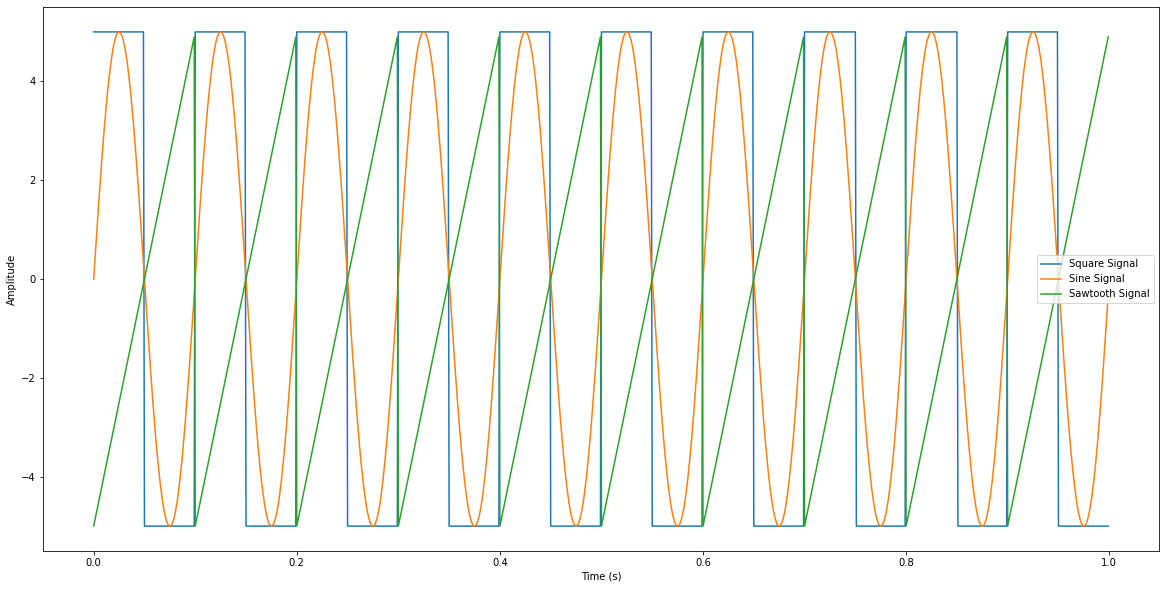

In [9]:
fs = 1000
t = np.arange(0,1, 1/fs)

square_signal = 5*signal.square(2 * np.pi * 10 * t)
sine_signal = 5*np.sin(2 * np.pi * 10 * t)
sawtooth_signal = 5*signal.sawtooth(2 * np.pi * 10 * t)

plt.figure(figsize=(20, 10))
plt.plot(t, square_signal, label='Square Signal')
plt.plot(t, sine_signal, label='Sine Signal')
plt.plot(t, sawtooth_signal, label='Sawtooth Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [10]:
square_mean,square_var = signal_statics(square_signal)
print(f'Square Signal Mean: {square_mean}, Square Signal Variance: {square_var}')
sine_mean,sine_var = signal_statics(sine_signal)
print(f'Sine Signal Mean: {sine_mean}, Sine Signal Variance: {sine_var}')
sawtooth_mean,sawtooth_var = signal_statics(sawtooth_signal)
print(f'Sawtooth Signal Mean: {sawtooth_mean}, Sawtooth Signal Variance: {sawtooth_var}')

Square Signal Mean: 0.02, Square Signal Variance: 4.999959999839999
Sine Signal Mean: -3.410605131648481e-16, Sine Signal Variance: 3.5355339059327378
Sawtooth Signal Mean: -0.04999999999999892, Sawtooth Signal Variance: 2.8866070047722117


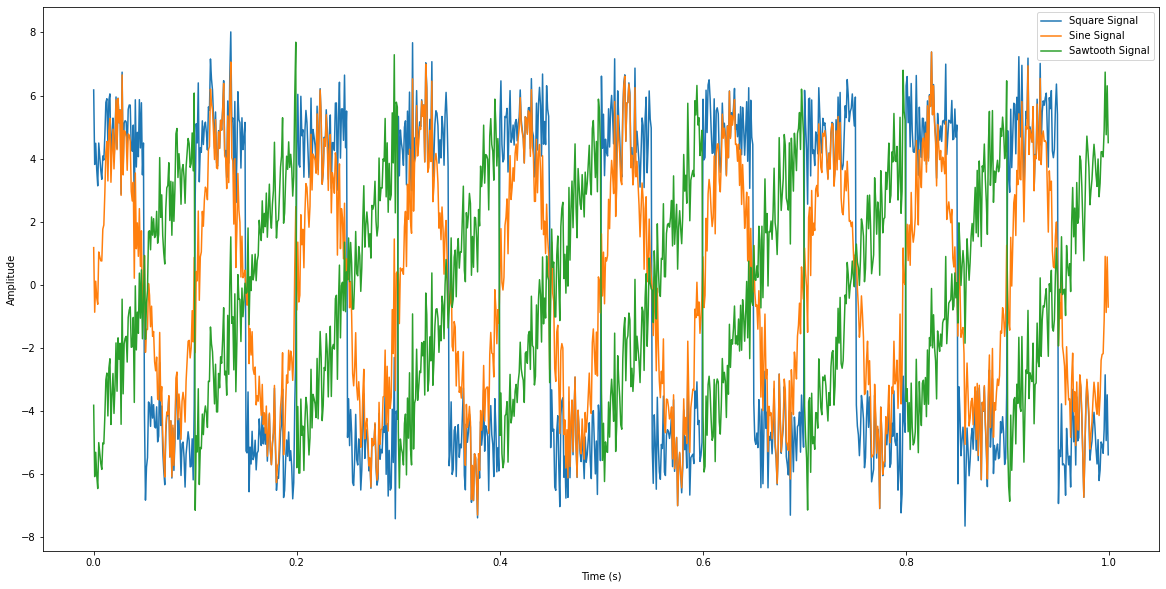

In [11]:
num_samples = len(t)

# Gaussian noise
noise = np.random.normal(0, 1, size=num_samples)

#uniform noise
#noise = np.random.uniform(-1, 1, size=num_samples)

# Adding noise to the sine signal
sine_signal_noise = sine_signal + noise
# Adding noise to the square signal
square_signal_noise = square_signal + noise
# Adding noise to the sawtooth signal
sawtooth_signal_noise = sawtooth_signal + noise

#ploting the signals
plt.figure(figsize=(20, 10))
plt.plot(t, square_signal_noise, label='Square Signal')
plt.plot(t, sine_signal_noise, label='Sine Signal')
plt.plot(t, sawtooth_signal_noise, label='Sawtooth Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [12]:
square_mean,square_var = signal_statics(square_signal_noise)
print(f'Square + Noise Signal Mean: {square_mean}, Square +Noise Signal Variance: {square_var}')
print(f'SNR square +noise signal {signal_to_noise_ratio(square_signal, noise)}')
sine_mean,sine_var = signal_statics(sine_signal_noise)
print(f'Sine + Noise Signal Mean: {sine_mean}, Sine + Noise Signal Variance: {sine_var}')
print(f'SNR sine +noise signal {signal_to_noise_ratio(sine_signal, noise)}')
sawtooth_mean,sawtooth_var = signal_statics(sawtooth_signal_noise)
print(f'Sawtooth + Noise Signal Mean: {sawtooth_mean}, Sawtooth + Noise Signal Variance: {sawtooth_var}')
print(f'SNR sawtooth +noise signal {signal_to_noise_ratio(sawtooth_signal, noise)}')

Square + Noise Signal Mean: -0.011340648846388149, Square +Noise Signal Variance: 5.0374117774598535
SNR square +noise signal 14.130266421382192
Sine + Noise Signal Mean: -0.03134064884638849, Sine + Noise Signal Variance: 3.6230188630573883
SNR sine +noise signal 11.119966464742381
Sawtooth + Noise Signal Mean: -0.0813406488463871, Sawtooth + Noise Signal Variance: 3.1099875795342715
SNR sawtooth +noise signal 9.359922376302057


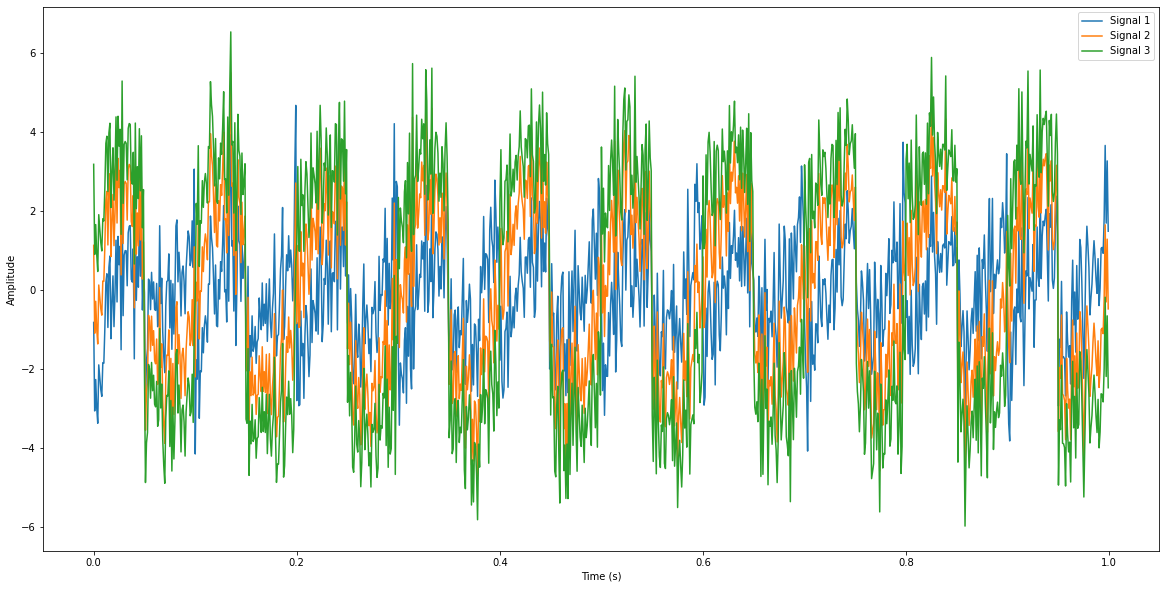

In [13]:
signal1 = 0.2*square_signal_noise + 0.2*sine_signal_noise + 0.6*sawtooth_signal_noise
signal2 = 0.33*square_signal_noise + 0.33*sine_signal_noise + 0.34*sawtooth_signal_noise
signal3 = 0.6*square_signal_noise + 0.2*sine_signal_noise + 0.2*sawtooth_signal_noise

# Ploting the signals
plt.figure(figsize=(20, 10))
plt.plot(t, signal1, label='Signal 1')
plt.plot(t, signal2, label='Signal 2')
plt.plot(t, signal3, label='Signal 3')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [14]:
signal1_mean,signal1_var = signal_statics(signal1)
print(f'Signal 1 Mean: {signal1_mean}, Signal 1 Variance: {signal1_var}')
print(f'SNR signal 1 {signal_to_noise_ratio(signal1, noise)}')
signal2_mean,signal2_var = signal_statics(signal2)
print(f'Signal 2 Mean: {signal2_mean}, Signal 2 Variance: {signal2_var}')
print(f'SNR signal 2 {signal_to_noise_ratio(signal2, noise)}')
signal3_mean,signal3_var = signal_statics(signal3)
print(f'Signal 3 Mean: {signal3_mean}, Signal 3 Variance: {signal3_var}')
print(f'SNR signal 3 {signal_to_noise_ratio(signal3, noise)}')

Signal 1 Mean: -0.05734064884638755, Signal 1 Variance: 1.3666250207687407
SNR signal 1 2.871492552998437
Signal 2 Mean: -0.041740648846387896, Signal 2 Variance: 2.1698961352728126
SNR signal 2 6.88125199667465
Signal 3 Mean: -0.02934064884638799, Signal 3 Variance: 3.261005325076541
SNR signal 3 10.418248057449667


In [15]:
signal1 = signal1/signal1_var
signal2 = signal2/signal2_var
signal3 = signal3/signal3_var

#### Applying PCA on signals

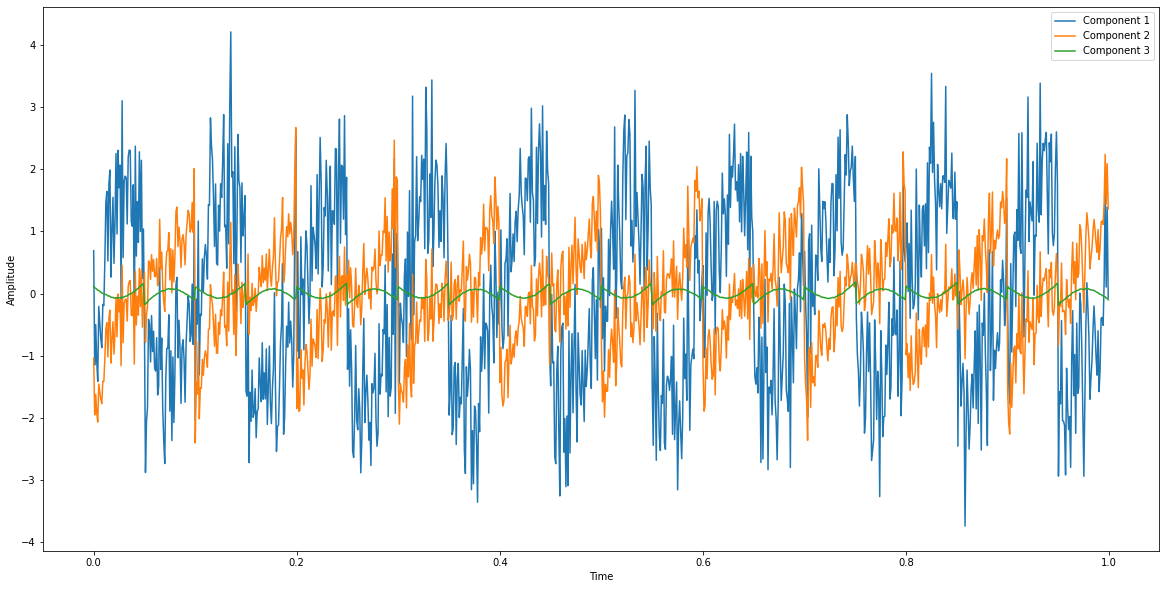

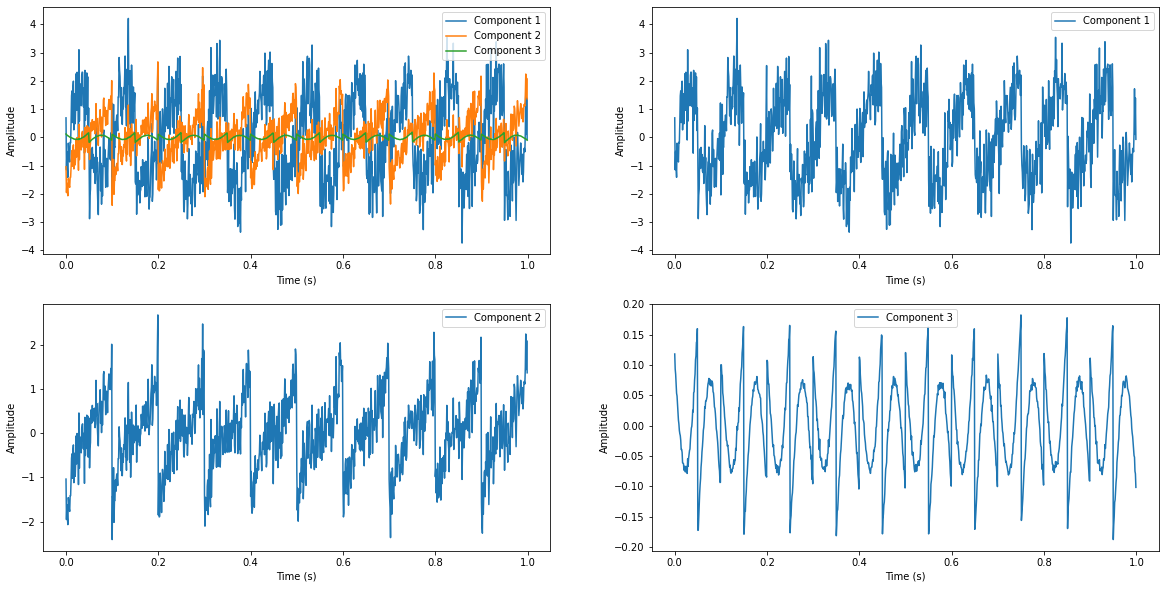

In [16]:
signals = np.column_stack([signal1, signal2, signal3])
Z, W = pca_using_covmat(signals)
plot_components(Z,t)
plot_components_separately(Z,t)

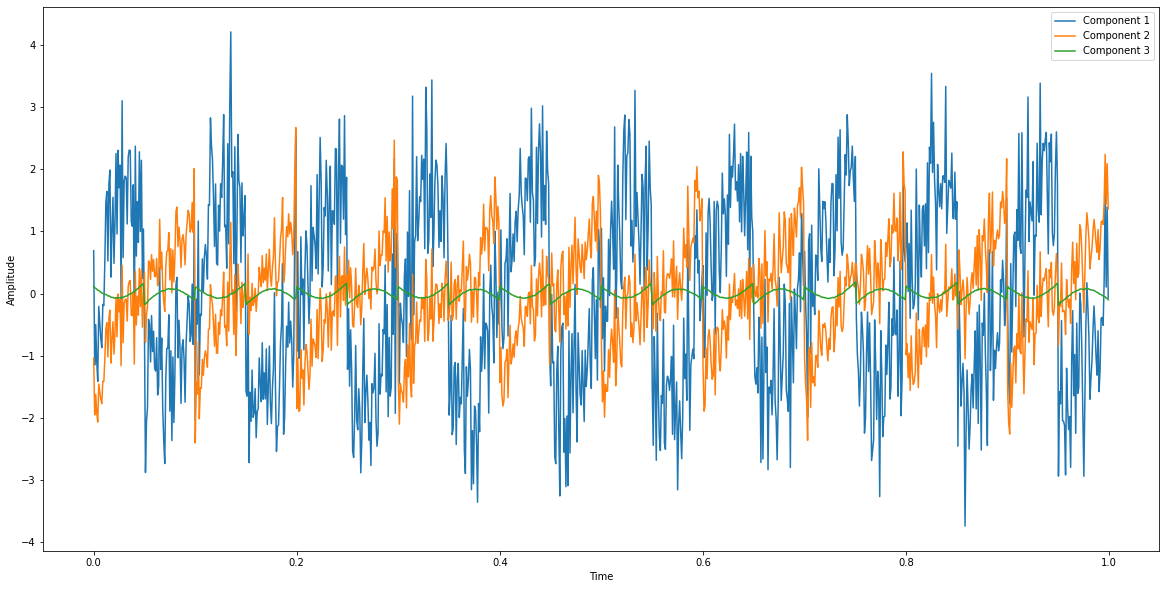

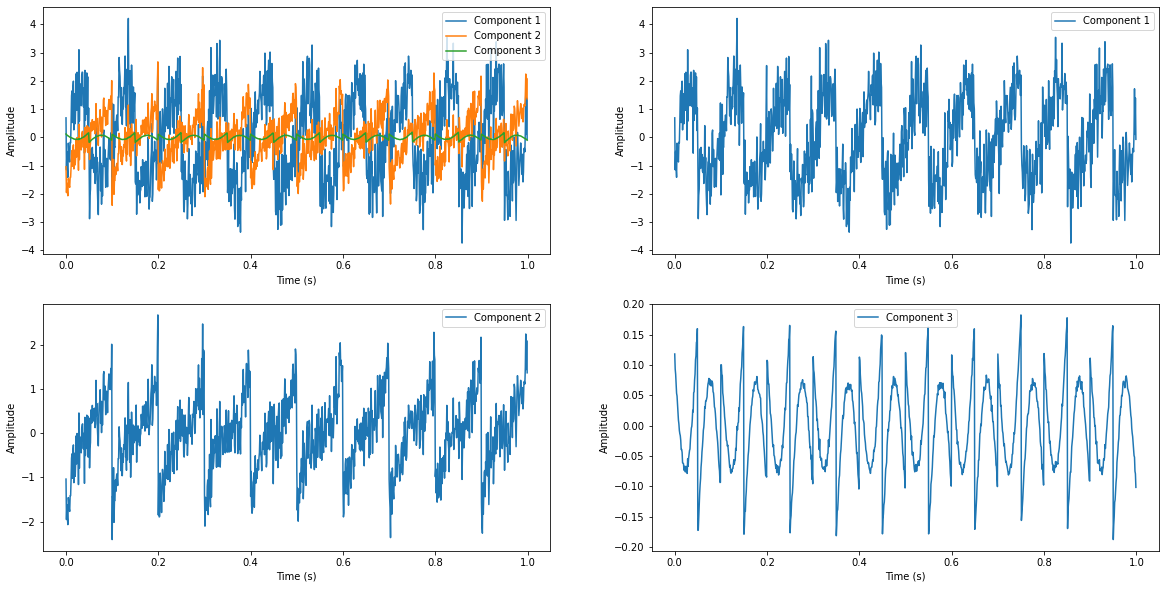

In [17]:
signals = np.column_stack([signal1, signal2, signal3])
Z, W = pca_using_svd(signals)
plot_components(Z,t)
plot_components_separately(Z,t)

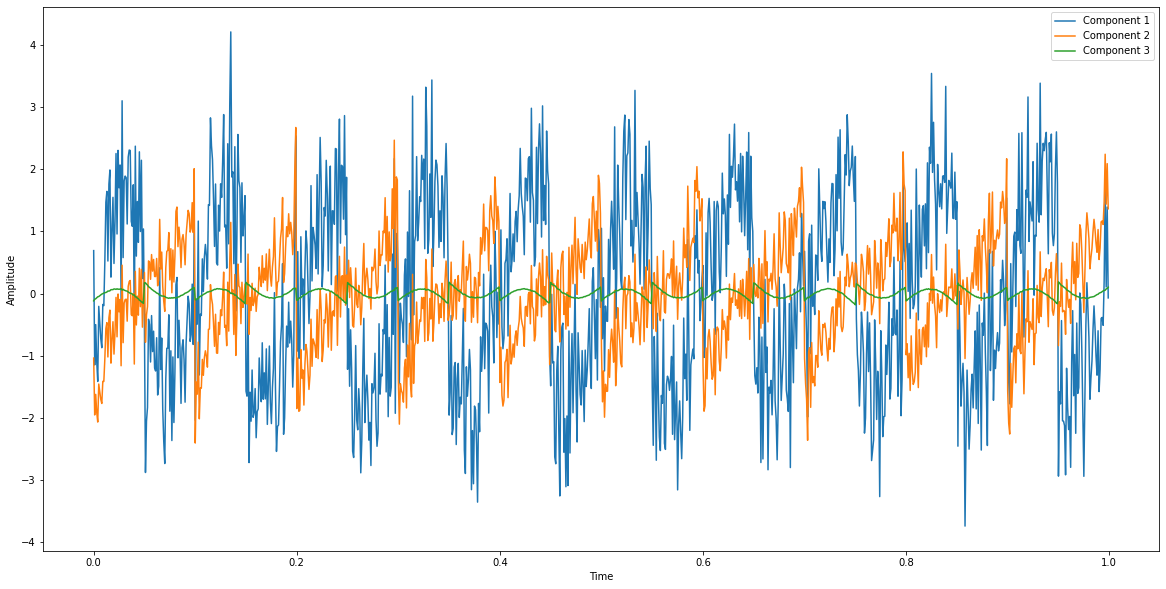

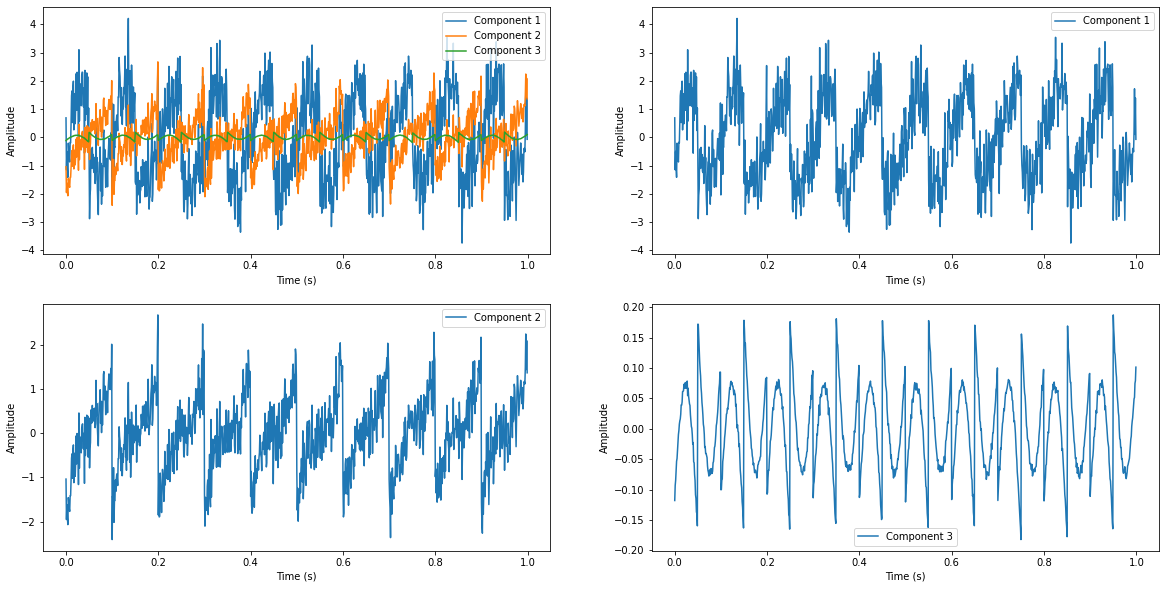

In [18]:
pca = PCA(n_components=3)
S_ = pca.fit_transform(np.array([signal1, signal2, signal3]).T)  # Reconstruct signals
A_ = pca.components_  # Get estimated mixing matrix

plot_components(S_,t)
plot_components_separately(S_,t)

#### Applying ICA on signals

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


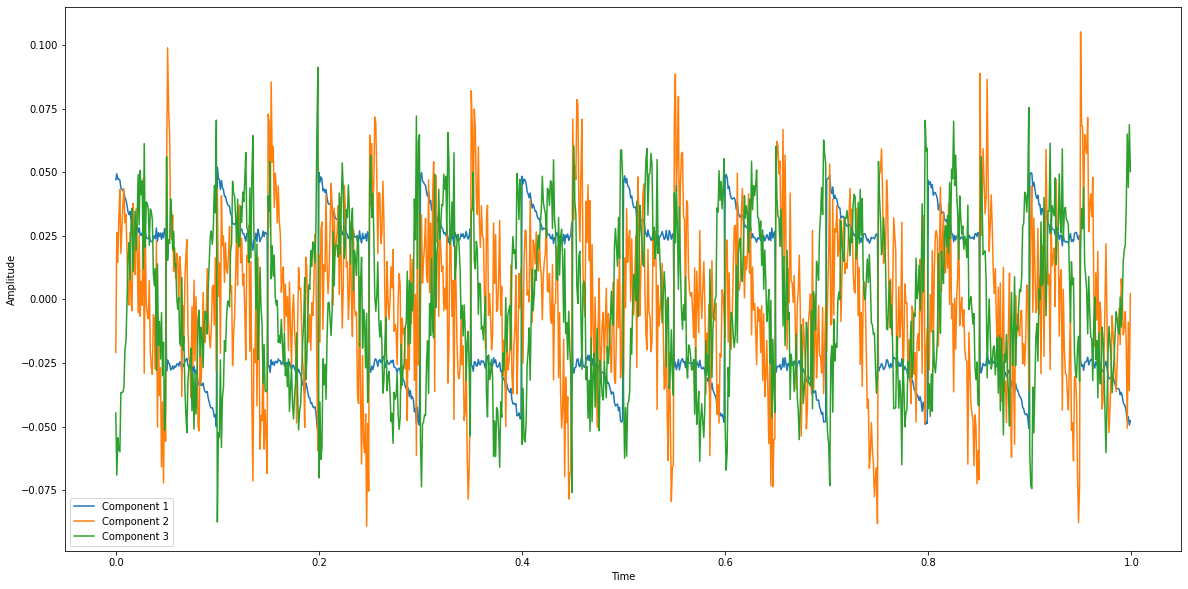

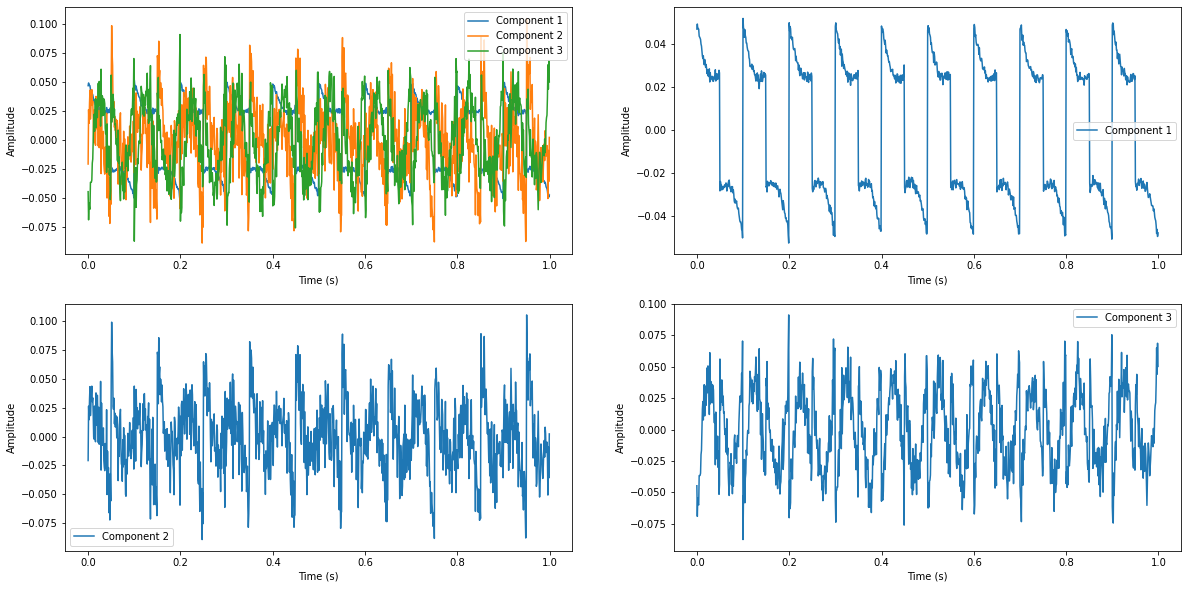

In [19]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(np.array([signal1, signal2, signal3]).T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

plot_components(S_,t)
plot_components_separately(S_,t)

# Application of PCA

## Image Compression

(229, 220, 3)


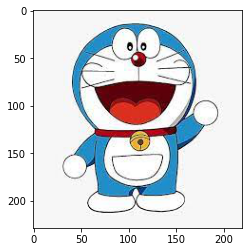

In [28]:
img = mpimg.imread('image.jpeg')
print(img.shape) 
#Showing the image
plt.imshow(img)

In [30]:
img_r = np.reshape(img, (229,660)) 
print(img_r.shape) 

(229, 660)


In [31]:
pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape) 
print(np.sum(pca.explained_variance_ratio_) )


(229, 32)
0.9223695962906364


In [33]:
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (229, 220 ,3)) 
print(temp.shape) 

(229, 660)
(229, 220, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


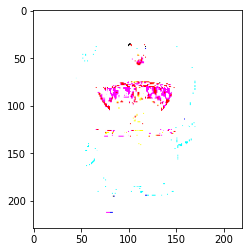

In [34]:
plt.imshow(temp)

# EEG analysis

This is a sample dataset provided by MNE. 
- In this experiment, checkerboard patterns were presented to the subject into the left and right visual field, interspersed by tones to the left or right ear. The interval between the stimuli was 750 ms. Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face.
- EEG data from a 60-channel electrode cap was acquired simultaneously with the MEG
- We are using only EEG data ( along with EOG and ECG channels recorded)

Link to the description - https://mne.tools/stable/overview/datasets_index.html#sample

In [39]:
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = str(data_path) + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
raw = mne.io.Raw(raw_fname)
raw.info

Opening raw data file C:\Users\91626\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>

# EEG

---


# **Plot the RAW data and view** 

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


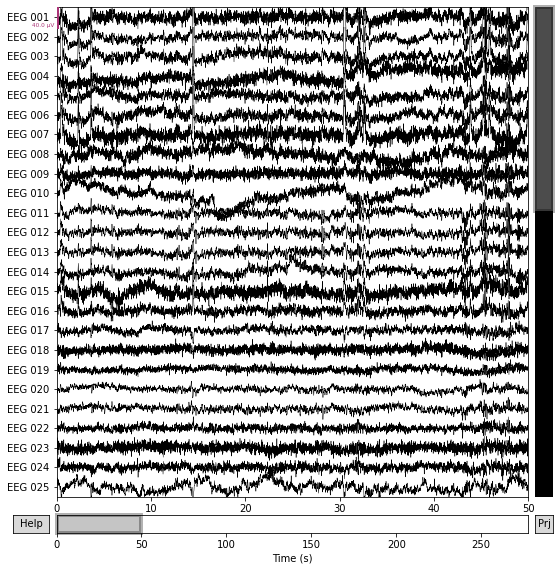

In [40]:
raw_eeg = raw.copy()
raw_eeg.pick_types(meg=False, eeg=True, eog=True, ecg=True) # Selecting EEG, EOG and ECG channels 
x = raw_eeg.plot(duration=50,n_channels=25) # Tweak duration & number of channels 



---


# Run ICA

In [22]:
ica_eeg = ICA(n_components=20, random_state=97) 
ica_eeg.fit(raw_eeg) 

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.4s.


<ICA | raw data decomposition, method: fastica (fit in 70 iterations on 41700 samples), 20 ICA components (59 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=21, n_times=41700
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


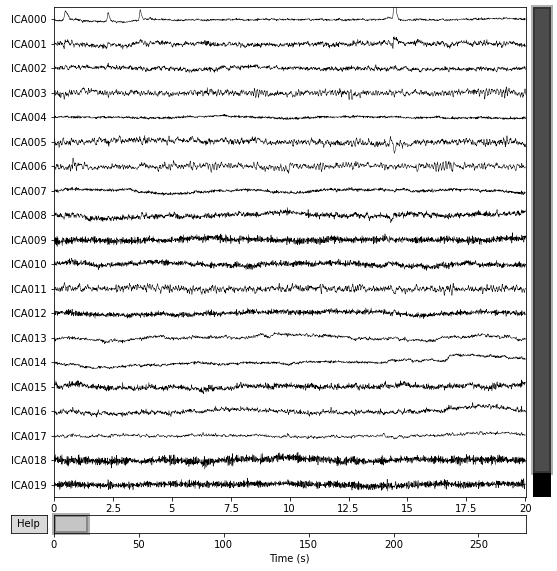

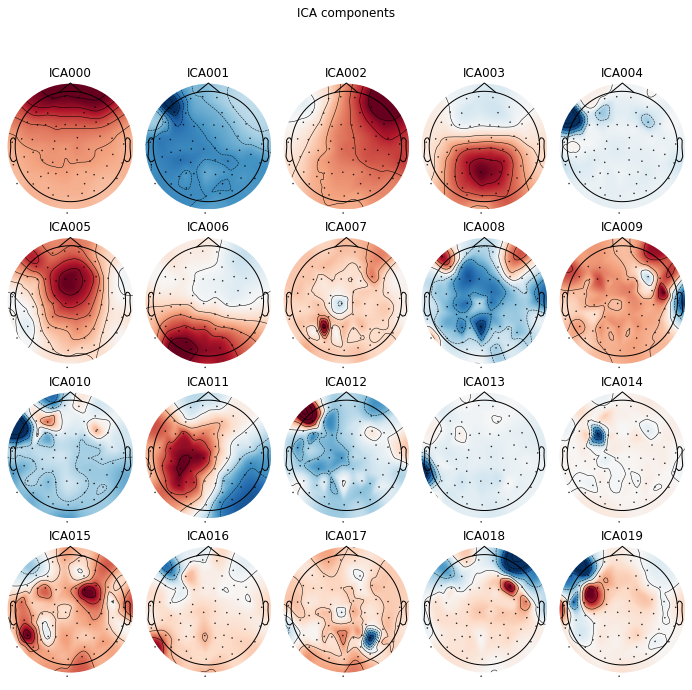

In [ ]:
x = ica_eeg.plot_sources(raw_eeg) # Plot time series
x = ica_eeg.plot_components() #Plot topographies

# Drop artefactual components

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 8 ICA components
    Projecting back using 59 PCA components


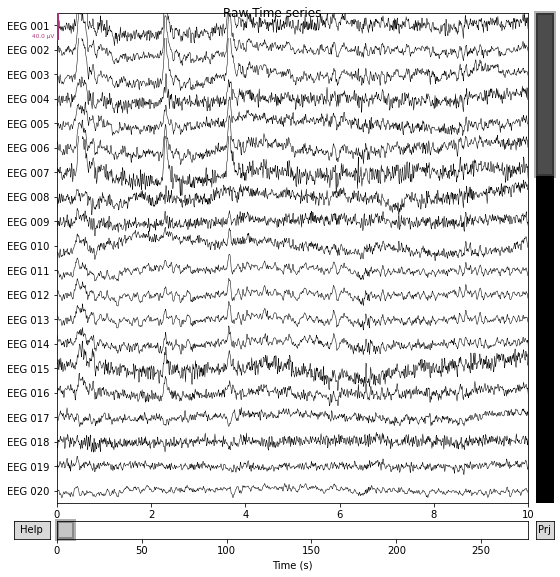

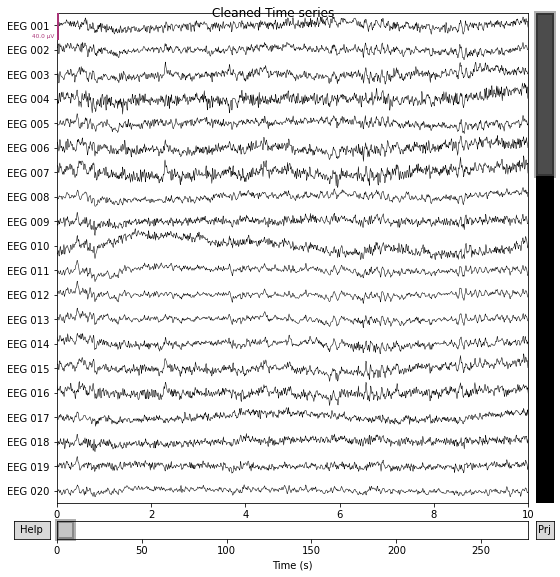

In [ ]:
raw_eeg.load_data()

ica_eeg.exclude = [0,4,5,7,9,10,18,19]  # indices chosen based on various plots above <======

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_eeg.copy()
ica_eeg.apply(reconst_raw)

#Raw
raw_eeg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()

# raw_eeg.plot_psd(fmax=40)
# reconst_raw.plot_psd(fmax=40)
# plt.show()

# del reconst_raw
